# Final Project on EDA for Machine Learning

## Data was taken from IBM Professional Certificate Course 

### Bagirov Isa 

## Quick Description:
I will use Amen Housing Data, which has many obeseravations about homes and their attributes. This data will be used to make some exploration and showing some insights from observations. 

## I. Data Exploration Plan


I will take some variables and compare them to Sale Price(target column).<br>
So I will try to choose variables, which seems to have relationship with Sale Price

In [1]:
#Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from matplotlib.ticker import FuncFormatter as FF
from matplotlib.ticker import StrMethodFormatter as SMF

In [2]:
data = pd.read_csv("data/Ames_Housing_Data.tsv", sep = '\t');
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
data.shape

(2930, 82)

In [4]:
print(data['Bldg Type'].unique())

['1Fam' 'TwnhsE' 'Twnhs' 'Duplex' '2fmCon']


In [5]:
data.dtypes.value_counts()

object     43
int64      28
float64    11
dtype: int64

In [6]:
col_na = data.isna().sum().to_frame().sort_values(by = 0, axis = 0)
data = data.rename(columns = {"Lot Area":"LotArea", "Year Built":"YearBuilt"})
print(col_na[col_na[0] == 0].index)

Index(['Order', 'Sale Condition', 'Heating QC', 'Central Air', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'Foundation', 'TotRms AbvGrd', 'Fireplaces', 'Paved Drive',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'Sale Type', 'Functional', 'Exter Cond', 'Heating', 'Condition 1',
       'House Style', 'Bldg Type', 'Condition 2', 'Exter Qual', 'Neighborhood',
       'Land Slope', 'Lot Config', 'Utilities', 'Land Contour', 'Lot Shape',
       'Street', 'Lot Area', 'MS Zoning', 'MS SubClass', 'PID', 'Overall Qual',
       'Overall Cond', 'SalePrice', 'Year Built', 'Year Remod/Add',
       'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd'],
      dtype='object')


As our main columns I choose Neighborhood, Lot Area and Buildage Type and Year Built

## II. Data cleaning

As I used columns which do not have any missing values, I do not need to make any data cleaning, except some outliers in Year Built. Years until the date when number of houses increased to 50 homes will be dropped from statistic.

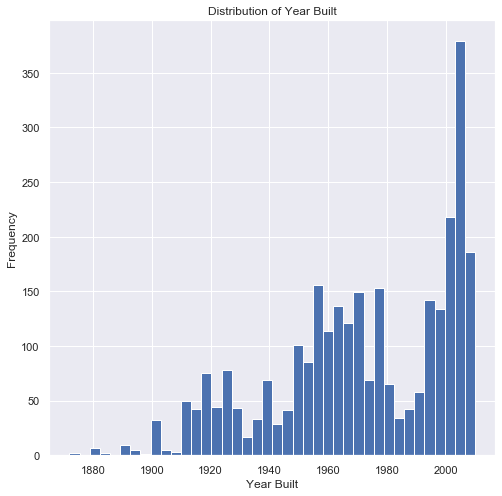

In [7]:
sns.set()

fig, ax = plt.subplots(1, 1, figsize = (8, 8))

ax.hist(data.YearBuilt, bins=40);
ax.set(xlabel='Year Built', 
       ylabel='Frequency',
       title='Distribution of Year Built');

In [8]:
cl = pd.DataFrame(data[['SalePrice', 'YearBuilt']].groupby(['YearBuilt']).describe())
cl.columns = cl.columns.droplevel()
cl[(cl['count'] > 50)]

,count,mean,std,min,25%,50%,75%,max
YearBuilt,,,,,,,,
1920,57.0,111681.421053,40409.698404,34900.0,86000.00,108500.0,128000.00,256000.0
1976,54.0,161778.611111,46460.275367,75190.0,133625.00,151450.0,180375.00,299800.0
1977,57.0,167215.789474,41430.939912,82500.0,143500.00,157000.0,190000.00,318750.0
1999,52.0,206135.923077,45311.784711,155000.0,174750.00,192500.0,221250.00,337000.0
2003,88.0,235270.409091,90975.440417,131500.0,177375.00,212000.0,269625.00,615000.0
2004,99.0,217742.373737,73250.327843,130000.0,171500.00,192000.0,258500.00,552000.0
2005,142.0,241993.718310,88385.277651,132000.0,176000.00,208350.0,282178.25,556581.0
2006,138.0,259623.847826,90495.298134,84500.0,194900.75,239149.5,299559.00,591587.0
2007,109.0,265924.935780,88932.567395,146000.0,200000.00,250000.0,314813.00,610000.0


So our lower bound will be 1920

In [9]:
data = data[data['YearBuilt'] >= 1920]
data.shape

(2754, 82)

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


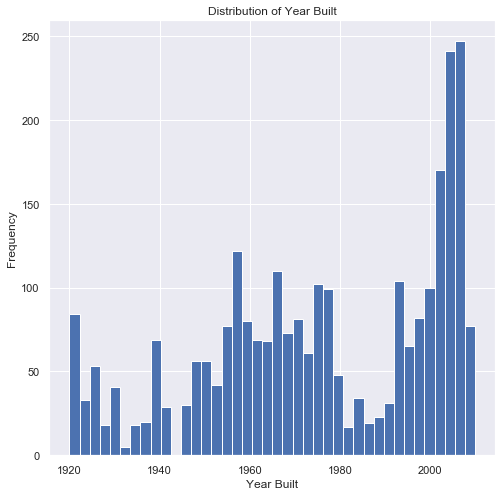

In [10]:
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
ax.hist(data.YearBuilt, bins=40)
ax.set(xlabel='Year Built', 
       ylabel='Frequency',
       title='Distribution of Year Built')
fig.show()

## III. Data Exploration

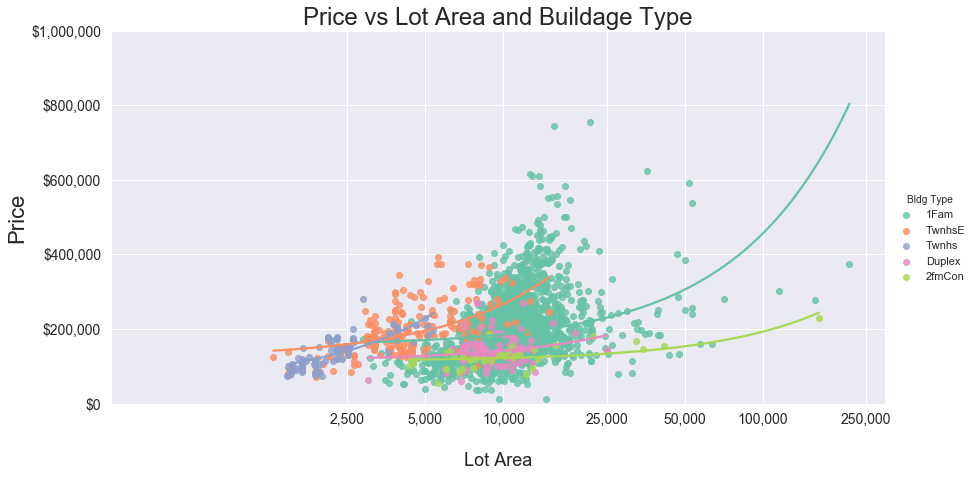

In [11]:
gr = sns.lmplot(data = data, x = 'LotArea', y = 'SalePrice', hue = 'Bldg Type', palette = 'Set2', ci = None, height = 6, aspect = 2)

ax = plt.gca()

ax.set_title('Price vs Lot Area and Buildage Type', fontsize = 24)

ax.set_ylabel("Price", fontsize = 22)
ax.set_ylim(0, 1000000)
ax.yaxis.set_major_formatter(SMF('${x:,.0f}'))

ax.set_xlabel("\nLot Area", fontsize = 18)
ax.set_xscale('log')
xlabels = [2500, 5000, 10000, 25000, 50000, 100000, 250000]
ax.set_xticks(xlabels)
ax.get_xaxis().set_major_formatter(FF(lambda x, p: format(int(x), ',')))

ax.tick_params(axis = 'both', which = 'major', labelsize = 14)

This exploration show comparison between Price and Lot Area with Buildage Type.
Due to high level of skewness of the data, the lot area was log scaled.

Buildage type does not show a consistent relationship with Price. But Lot area is correlated with Price and it was shown in the graph above.

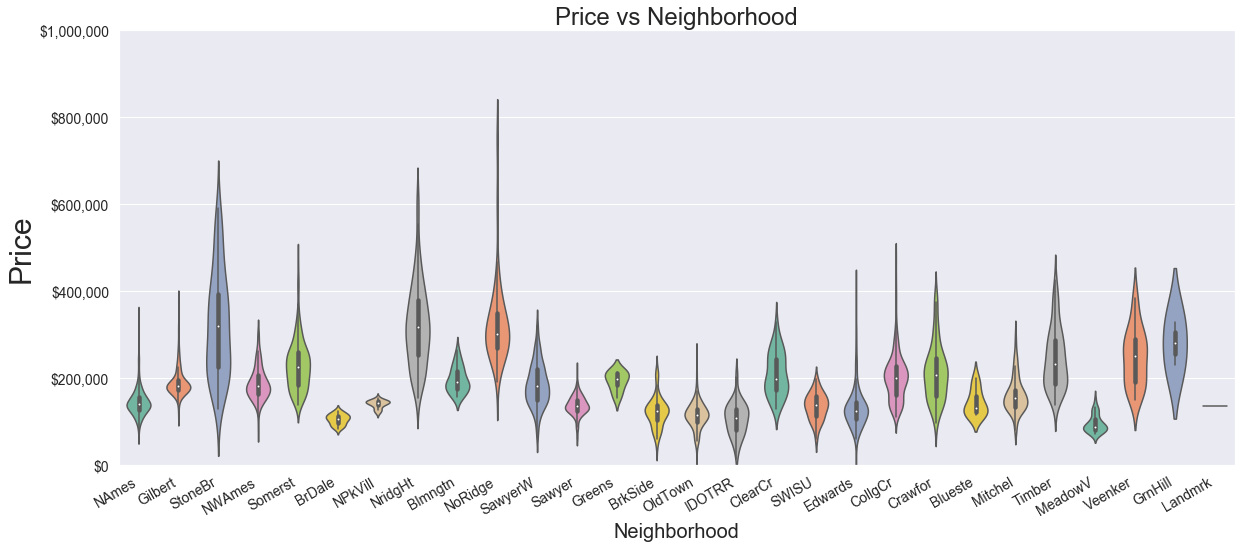

In [12]:
gr = sns.violinplot(data = data, x = 'Neighborhood', y = 'SalePrice', scale = 'width', width = 0.6,
                      palette = 'Set2',)

plt.gcf().set_size_inches(20, 8)

ax = plt.gca()

ax.set_title('Price vs Neighborhood', fontsize = 24)

ax.set_xlabel("Neighborhood", fontsize = 20)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30, ha = 'right')

ax.set_ylabel("Price", fontsize = 30)
ax.set_ylim(0, 1000000)
ax.yaxis.set_major_formatter(SMF('${x:,.0f}'))

ax.tick_params(axis = 'both', which = 'major', labelsize = 14)

This exploration show how much price is correlated with neighborhood. The variety of houses in each district is very wide. But there seems some neighborhoods, which can be identified as "luxury", for example StoneBr, and NridgHt.

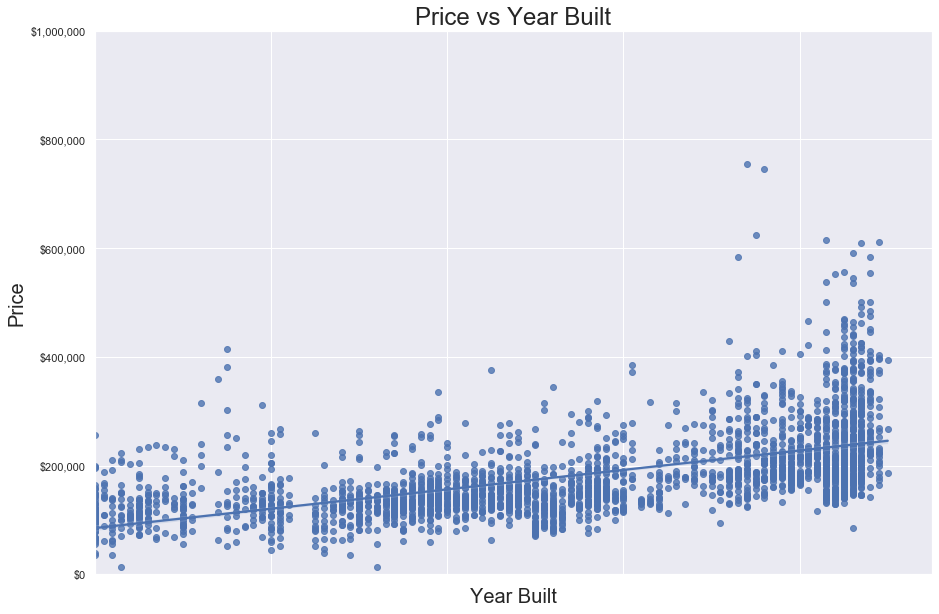

In [22]:
gr = sns.regplot(data = data, x = 'YearBuilt', y = 'SalePrice')
gr.figure.set_size_inches(15, 10)
ax = plt.gca()

ax.set_title('Price vs Year Built', fontsize = 24)

ax.set_xlabel("Year Built", fontsize = 20)
ax.set_xlim(1920, 2015)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30, ha = 'right')

ax.set_ylabel("Price", fontsize = 20)
ax.set_ylim(0, 1000000)
ax.yaxis.set_major_formatter(SMF('${x:,.0f}'))

This exploration show how much price is correlated with year built. There are clearly seen that price is also higly correlated with year built. 

## IV) Hypothesis statement and testing

1. An increase in Lot Area will increase Sale Price
2. Neighborhoods StoneBr and NridgHt are luxury neighborhoods
3. The Sale Price increase is correlated with Year Built

Chosen Hypothesis:
An increase in Year Built will increase Sale Price

H0: Year Built does not affect Sale Price.

HA: Year Built affects Sale Price.

In [38]:
from sklearn.feature_selection import f_regression as FR
from sklearn.linear_model import LinearRegression

x = data['YearBuilt'].to_numpy().reshape(-1, 1)
y = data['SalePrice'].to_numpy().reshape(-1,)

r_sq = reg.score(x, y)
reg = LinearRegression().fit(x, y)
               
p_val = FR(x, y)[1][0]
print("The R-squared is {}.".format(round(r_sq, 3)))
print("The p_value is {}.".format(p_val))

The R-squared is 0.337.
The p_value is 1.264762102091762e-247.


The p_value is less than 0.05, so we will reject our null hypothesis, that means that we accept alternative hypothesis.

## V) Further steps for analysis

Determining other variables correlation with Price and conducting multiple regression would be the next steps in the analysis.

## VI) Data Summary

Although there are some missing values, the vast majority of this data is complete and of good quality.

Closeness to the center of the city and charachteristics of neighbor activities will be better indicator than Neighborhood.

It is important to stress that this model is specific to Ames, IA, and would vary greatly across the US. Although this data set of nearly 3,000 observations is satisfactory for a city, a much larger sample would be necessary for the US.